### In the name of God
---
### Deep Learning HW2
### Fine-tuning Resnet



**Name:** ...

**Std. No.:** ...

In [ ]:
import torch
import torchvision
from torch.autograd import Variable
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import models
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
import matplotlib.pyplot as plt
! pip install explainable-cnn

## Data Preparation

In [ ]:
# Define the transformations to apply to the images
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
batch_size = 64
num_classes = 10

########################## TODO ##########################
# Download cifar10 dataset
train_dataset = None
test_dataset = None
####################### (5 points) #######################

########################## TODO ##########################
# Create data loaders for the train and test datasets
# In this homework we use test dataset as validation dataset

train_loader = None
test_loader = None
####################### (5 points) #######################

Files already downloaded and verified
Files already downloaded and verified


## Model

In [ ]:
class Model(nn.Module):
    def __init__(self, num_classes, freeze=False):
        super(Model, self).__init__()

        ########################## TODO ##########################
        # Initialize a ResNet-50 torchvision model with pre-trained weights
        # Modify the last layer of the model (model.fc) and replace it with
        # a sequence of multiple linear layers according to the following structure:
        # model.fc.in_features -> 128 -> 64 -> 32 -> num_classes
        # Use Relu activation functions between linear layers and LogSoftmax at the end

        self.model = None
        layers = []
        # complete here
        self.model.fc = nn.Sequential(*layers)
        ####################### (20 points) ######################

        ########################## TODO ##########################
        # if freeze falg is true, freeze all model parameters except for the fc layers

        # complete here
        ####################### (5 points) #######################

    def forward(self, x):
        return self.model(x)

In [ ]:
def train(model, epoch, optimizer, train_loader, criterion=nn.CrossEntropyLoss()):
    # Initialize the running loss and accuracy
    total_loss = 0
    correct = 0
    total_size = 0

    ########################## TODO ##########################
    # Set the model to train mode

    ####################### (5 points) #######################

    # Iterate over the batches of the train loader
    for batch_idx, (data, target) in enumerate(train_loader):
        ########################## TODO ##########################
        # Move the data and target to the device
        
        ####################### (5 points) #######################
        
        # Zero the optimizer gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(data)
        loss = criterion(output, target)
        # Update the running loss
        total_loss += loss.item()
        total_size += data.size(0)

        ########################## TODO ##########################
        # Update correct variable based on model output and traget

        correct += None
        ####################### (10 points) ######################

        # Backward pass and optimizer step
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tAverage loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), total_loss / total_size))


    return total_loss / total_size, 100. * correct / len(train_loader.dataset)

def test(model, test_loader, criterion=nn.CrossEntropyLoss()):
    ########################## TODO ##########################
    # Set the model to evaluation mode

    ####################### (5 points) #######################

    # Initialize the running loss and accuracy
    test_loss = 0
    correct = 0
    # Iterate over the batches of the validation loader
    with torch.no_grad():
        for data, target in test_loader:
            ########################## TODO ##########################
            # Move the data and target to the device
            
            ####################### (0 points) #######################
            # Forward pass
            output = model(data)
            loss = criterion(output, target)
            # Update the running loss and accuracy
            test_loss += loss.item()

            ########################## TODO ##########################
            # Update correct variable based on model output and traget

            correct += None
            ####################### (0 points) #######################

    # Calculate the validation loss and accuracy
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    return test_loss, 100. * correct / len(test_loader.dataset)

In [ ]:
model_1 = Model(num_classes, freeze=False)
model_2 = Model(num_classes, freeze=True)
model_1

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0):

## Training

In [ ]:
########################## TODO ##########################
# Run the following code for each of the above models
# Based on your resources you can choose number of epochs from 3 to 5
####################### (10 points) #######################
model = model_1
num_epochs = 5
# Set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001, momentum=0.9)
model = model.to(device)


####   Train Model
# Initialize variables for early stopping
early_stopping_threshold = 3
epochs_no_improve = 0
early_stop = False
best_val_acc = 0

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train(model, epoch, optimizer, train_loader)
    val_loss, val_acc = test(model, test_loader)

    ########################## TODO ##########################
    # Check early stopping
    if val_acc > best_val_acc:
        # complete here
        pass
    else:
        # complete here
        pass

    if epoch > 3 and epochs_no_improve == early_stopping_threshold:
        print('Early stopping!' )
        early_stop = True
        break

    ####################### (10 points) #######################

Train Epoch: 1 [0/50000 (0%)]	Average loss: 0.036105
Train Epoch: 1 [6400/50000 (13%)]	Average loss: 0.036023
Train Epoch: 1 [12800/50000 (26%)]	Average loss: 0.035931
Train Epoch: 1 [19200/50000 (38%)]	Average loss: 0.035765
Train Epoch: 1 [25600/50000 (51%)]	Average loss: 0.035471
Train Epoch: 1 [32000/50000 (64%)]	Average loss: 0.034834
Train Epoch: 1 [38400/50000 (77%)]	Average loss: 0.033780
Train Epoch: 1 [44800/50000 (90%)]	Average loss: 0.032433

Test set: Average loss: 0.0165, Accuracy: 5827/10000 (58%)

Train Epoch: 2 [0/50000 (0%)]	Average loss: 0.021201
Train Epoch: 2 [6400/50000 (13%)]	Average loss: 0.019345
Train Epoch: 2 [12800/50000 (26%)]	Average loss: 0.018327
Train Epoch: 2 [19200/50000 (38%)]	Average loss: 0.017418
Train Epoch: 2 [25600/50000 (51%)]	Average loss: 0.016577
Train Epoch: 2 [32000/50000 (64%)]	Average loss: 0.015913
Train Epoch: 2 [38400/50000 (77%)]	Average loss: 0.015271
Train Epoch: 2 [44800/50000 (90%)]	Average loss: 0.014789

Test set: Average loss

### GradCam

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1359: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


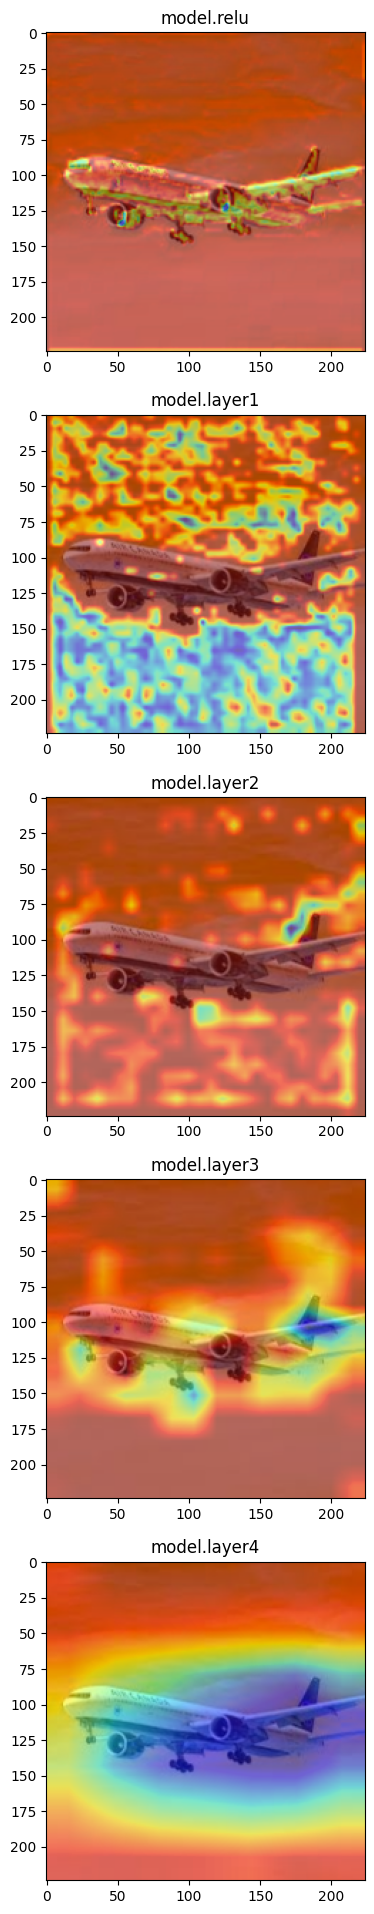

In [ ]:
from explainable_cnn import CNNExplainer

classes_name = {
                0: 0, # "airplane"
                1: 1, # "automobile"
                2: 2, # "bird"
                3: 3, # "cat"
                4: 4, # "deer"
                5: 5,  # "dog"
                6: 6, # "frog"
                7: 7, # "horse"
                8: 8, # "ship"
                9: 9 # "truck"
}
layers = ["model.relu", "model.layer1", "model.layer2", "model.layer3", "model.layer4"]
x_cnn = CNNExplainer(model_1, classes_name)

########################## TODO ##########################
# Pick a picture of your choice and Run the following code with your trained model_1

grad_cam = x_cnn.get_grad_cam(
    '/content/airplane.jpg', # replace with your image path
    0, # replace with your image label
    (224, 224),
    layers
)
####################### (5 points) #######################

fig, axs = plt.subplots(len(layers), figsize=(10, 24))
# Note that get_grad_cam() returns list of images (numpy array)
for i in range(0, len(layers)):
  axs[i].set_title(layers[i])
  axs[i].imshow(grad_cam[i].astype('uint8'))


#### Explain about one advantage and one limitation of using Grad-CAM (Gradient-weighted Class Activation Mapping) as a method for explaining the predictions of Convolutional Neural Networks (CNNs) (15 point)

your answer